# In this Notebook:
- We define global setting for plotting with Seaborn with a custom color palette
containing the colors to be same as our presentation layout
- Create several plots to visualize the relationship between the feature description length and the adoption speed


In [74]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt


In [75]:
# set seaborn options globally
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
custom_palette = sns.set_palette(sns.color_palette(colors))
custom_params = {"axes.facecolor": "#f2f1ec", 
"figure.facecolor": "#f2f1ec",
'figure.titleweight': 'bold',
'figure.titlesize': 28,#'large',
'grid.alpha': 1.0,
'font.size': 16.0,
'font.weight': 'bold',
'axes.labelsize': 16,
'axes.labelcolor': '#365b6d',
'axes.titlepad': 10.0,
'axes.titlesize': 'large',
'xtick.labelsize': 16,
'xtick.color': '#365b6d',
'xtick.bottom': True,
'ytick.labelsize': 16,
'ytick.color': '#365b6d',
'ytick.left': True,
'text.color' : '#365b6d',
'legend.title_fontsize': 12.0,
'legend.frameon': False,
'axes.linewidth': 3,#0.8,
'axes.spines.left': True,
'axes.spines.bottom': True,
'axes.spines.right': True,
'axes.spines.top': True,
'axes.edgecolor': '#365b6d',
'axes.labelweight': 'bold',
'axes.titleweight': 'bold',
'patch.edgecolor': '#f2f1ec'
}
sns.set_theme(style="white", palette=colors, rc=custom_params)

In [76]:
df = pd.read_csv('../data/petfinder-adoption-prediction/df_eda.csv')
df.columns

Index(['type', 'gender', 'maturitysize', 'furlength', 'sterilized', 'health',
       'adoptionspeed', 'color_pattern', 'breed_type', 'vaccinated_dewormed',
       'fee_bin', 'age_bin', 'photoamt_11', 'description_char'],
      dtype='object')

In [77]:
# Line plot
df["adop_slowfast"] = df["adoptionspeed"]
df["adop_slowfast"] = df["adop_slowfast"].replace(2,1)
df["adop_slowfast"] = df["adop_slowfast"].replace(3,1)
df["adop_slowfast"] = df["adop_slowfast"].replace(4,2)


In [78]:
li = []
for element in df.description_char:
    if element < 50:
        li.append(0)
    elif 50 <= element < 250:
        li.append(50)
    elif 250 <= element < 500:
        li.append(250)
    elif 500 <= element < 1000:
        li.append(500)
    elif element >= 1000:
        li.append(1000)


    
df["desc_bin"] = li

In [79]:
pd.crosstab(df.desc_bin, df.adop_slowfast, normalize = "index")

adop_slowfast,1,2
desc_bin,,
0,0.705596,0.294404
50,0.721011,0.278989
250,0.746245,0.253755
500,0.752202,0.247798
1000,0.781369,0.218631


<Axes: xlabel='desc_bin'>

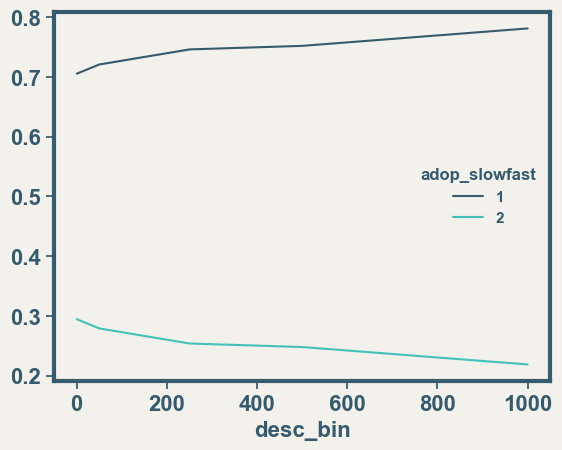

In [80]:
pd.crosstab(df.desc_bin, df.adop_slowfast, normalize = "index").plot.line()

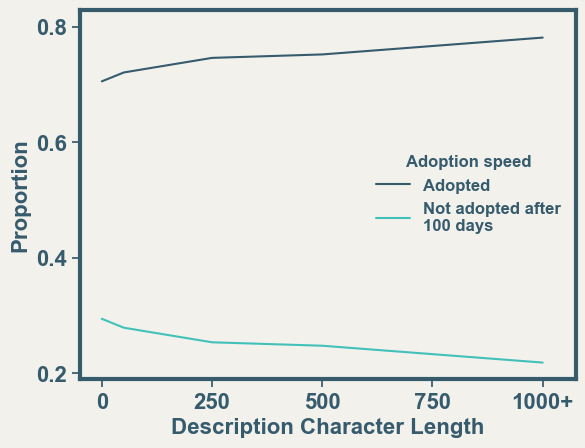

In [81]:
#plt.figure(figsize=(12.8,9.6))
pd.crosstab(df.desc_bin, df.adop_slowfast, normalize = "index").plot.line(xlabel='Description Character Length', ylabel='Proportion')#,figsize=(12.8,9.6))
plt.ylim((0.19,0.83))
plt.xlim(-50,1075)
x_labels = ['0', '250','500','750', '1000+']
plt.xticks(ticks=[0, 250,500,750, 1000],labels=x_labels,color='#365b6d',fontsize=16, rotation = 0)
y_labels = [0.2, 0.4,0.6,0.8]
plt.yticks(ticks=[0.2, 0.4,0.6,0.8],labels=y_labels,color='#365b6d',fontsize=16, rotation = 0)
ax = plt.gca()
legend = ax.legend(title="Adoption speed",frameon=False, labelcolor='#365b6d', fontsize=12)
labellist2 = ["Adopted", "Not adopted after\n100 days"]
for i,label in enumerate(legend.get_texts()):
    #label.set_weight('bold')
    label.set_text(labellist2[i]) 

plt.savefig('../images/binned_descr_length_diff_yaxis.png', dpi=1200, bbox_inches='tight')

In [82]:
df.adop_slowfast.value_counts(normalize=True)

adop_slowfast
1    0.733679
2    0.266321
Name: proportion, dtype: float64

In [83]:
desc_ct = pd.crosstab(df.desc_bin, df.adop_slowfast, normalize = "index")
desc_ct = desc_ct.reset_index()
desc_ct = pd.melt(desc_ct, id_vars='desc_bin', var_name='adoptionspeed', value_name='value')
desc_ct

,desc_bin,adoptionspeed,value
0,0,1,0.705596
1,50,1,0.721011
2,250,1,0.746245
3,500,1,0.752202
4,1000,1,0.781369
5,0,2,0.294404
6,50,2,0.278989
7,250,2,0.253755
8,500,2,0.247798
9,1000,2,0.218631


# New binning


In [84]:
df.shape

(11565, 16)

In [85]:
df.description_char.describe()

count    11565.000000
mean       332.118029
std        368.928512
min          0.000000
25%        113.000000
50%        231.000000
75%        424.000000
max       6664.000000
Name: description_char, dtype: float64

In [86]:

df.query("description_char > 1000")

# Alles über 1000 als 1000 und dann bins in 10er oder 20er oder 25er schritten

,type,gender,maturitysize,furlength,sterilized,health,adoptionspeed,color_pattern,breed_type,vaccinated_dewormed,fee_bin,age_bin,photoamt_11,description_char,adop_slowfast,desc_bin
65,0,1,1,1,0,0,3,1,1,0,0,1,11.0,1584.0,1,1000
66,0,0,1,0,1,0,3,2,1,0,0,0,11.0,1308.0,1,1000
83,1,1,1,0,1,0,2,2,1,0,0,1,5.0,1856.0,1,1000
90,0,0,2,0,0,0,2,2,0,0,0,2,4.0,1482.0,1,1000
91,0,0,1,1,1,0,2,2,0,1,1,1,1.0,1146.0,1,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,1,0,1,1,1,0,2,2,1,1,0,0,5.0,1563.0,1,1000
11504,0,1,2,0,0,1,4,2,1,0,0,2,4.0,1388.0,2,1000
11505,0,1,2,0,0,0,2,0,1,0,0,2,1.0,1328.0,1,1000
11507,0,0,1,1,1,0,2,2,1,1,0,1,11.0,1201.0,1,1000


In [87]:
df['description_char1000'] = np.clip(df['description_char'], a_min=None, a_max=1000)
bins = range(1, 1002, 250)

df["desc_bin"] = pd.cut(df['description_char1000'], bins=bins, labels=range(1, 5))


<Axes: xlabel='desc_bin'>

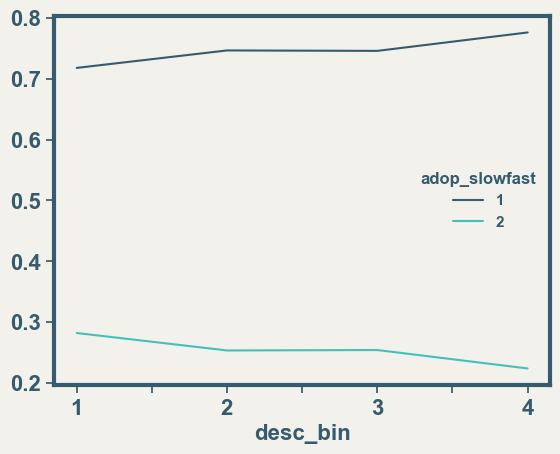

In [88]:
pd.crosstab(df.desc_bin, df.adop_slowfast, normalize = "index").plot.line()

In [89]:
desc_ct = pd.crosstab(df.desc_bin, df.adop_slowfast, normalize = "index")
desc_ct = desc_ct.reset_index()
desc_ct = pd.melt(desc_ct, id_vars='desc_bin', var_name='adop_slowfast', value_name='value')
desc_ct

,desc_bin,adop_slowfast,value
0,1,1,0.717699
1,2,1,0.746377
2,3,1,0.745650
3,4,1,0.775913
4,1,2,0.282301
5,2,2,0.253623
6,3,2,0.254350
7,4,2,0.224087


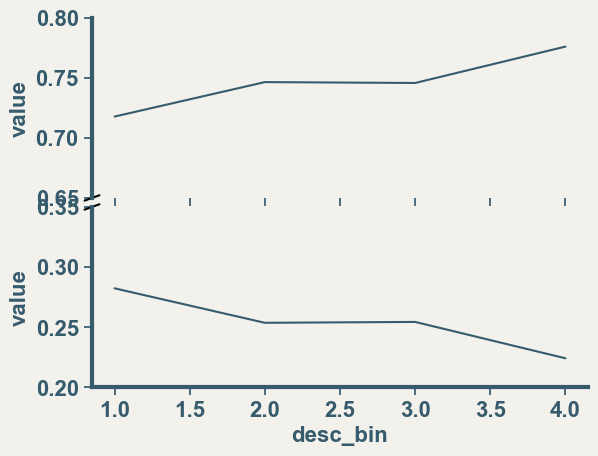

In [90]:
f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.05})
sns.lineplot(x="desc_bin", y="value",data=desc_ct.query("adop_slowfast == 1"), ax=ax_top)
sns.lineplot(x="desc_bin", y="value",data=desc_ct.query("adop_slowfast == 2"), ax=ax_bottom)
ax_top.set_ylim(0.65,0.8)   # those limits are fake
ax_bottom.set_ylim(0.2,0.35)

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)

ax = ax_top
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal

#remove one of the legend
#ax_bottom.legend_.remove()
plt.show()

<Axes: xlabel='description_char1000', ylabel='Count'>

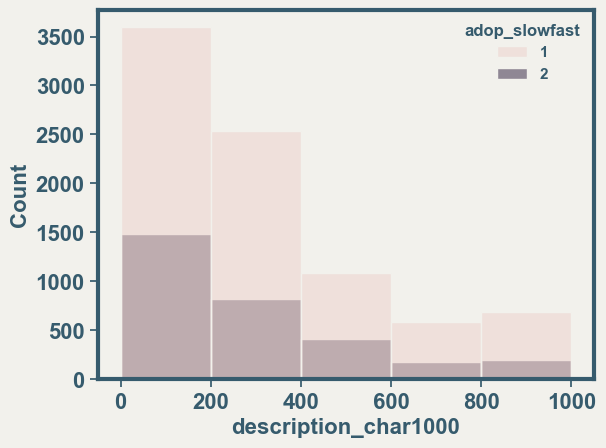

In [91]:
sns.histplot(data=df, x="description_char1000",bins=5,hue="adop_slowfast")

In [92]:
pd.crosstab(df.adoptionspeed,df.sterilized, normalize='index')

sterilized,0,1
adoptionspeed,,
1,0.139350,0.860650
2,0.184319,0.815681
3,0.256270,0.743730
4,0.352597,0.647403
